# Getting started
# MROB library is unfinished version of Mobile Robotics library. 
Please, don't publish this library anywhere. 

### MROB: Mobile Robotics library
The Skoltech Mobile Robotics library (mrob) is our common framework for implementing our robotics research and projects. It includes a core set of functionalities including perception, path planning and optimization. The present library is meant to be a self-contained library.

- common: common matrix definitions and typedefs.
- **SE3: Rigid Body Transformations library.**
- Fgraph: Factor Graph (WIP)
- PCReg: Point Cloud Registration (WIP)
- mrobPy Python bindings (using pybind11) for some of the above methods.

#### SE3 


 - **Constructors**:
    - Mat61,requires the Transformation in Se3
    - Mat4, requires the Transformation matrix 4x4, Lie algebra xi^ \in se3 representing the rigid body transformation around the identity, by default generates T = exp(0^) = I
    - SE3, allows to construct from Eigen expressions

  *Returns True is the matrix is a valid transformation and False if not*
 - **T()**, 4x4 Transformation matrix
 - **R()**, returns a matrix 3x3 of the SO3 rotation corresponding to the subblock matrix
 - **t()**, returns translation vector
 - **mul()**, multiplication function
 - **update_lhs()**, updates the current transformation incrementaly
 - **update_rhs()**,  exponential mapping of a skew symetric matrix in se3.
 - **ln()**, logarithm map, first we calculate ln(R) and then 
 
 V^-1 = I - 1/2 w^ + 1/o^2(1 - A / 2B) (w^)^2, $v = V^-1 t$ 

 Returns the vector $xi \in R^6$ which corresponds to the Lie algebra SE3
 - **transform()**, transforms a point $p = (x,y,z)'$ such as $res = T*p$. This function saves to transform to homogeneous coordinates.
 - **transform_array()**, transforms an array of points $P = {p_n} = (x,y,z)'_n$ such as $res = T*p_n$. The array is of the form $3xN$. This function saves to transform to homogeneous coordinates.
 - **inv()**, inverse: 
 $$
 T^-1 = \begin{vmatrix}
R'&-R't\\
0&1\\
\end{vmatrix}
$$
 - **adj()**, Adjoint: T Exp(x) = Exp ( Adj_T x) T
  $$
Adj_T  = \begin{vmatrix}
R & 0\\
t^R&R\\
\end{vmatrix}
$$
 - **distance()**,provide the distance as a norm on the tangent space of the $ln(T * T_{rhs}^{-1}) $
 - **print()**

## Download not compiled version of MROB libraray (mrob.zip) and unzip it

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='16sBf2VtnnlUnIPgqoKpR_rN8WTU88uSA',
                                    dest_path='./mrob.zip',
                                    unzip=True)

gdd.download_file_from_google_drive(file_id='1HQqNHCEqvzt2ZgDRAtUJjQoWoboQRfLS',
                                    dest_path='./points_dict.pkl',
                                    unzip=False)

Unzipping...Done.


## Install dependencies and compile the library


In [2]:
!sudo apt install build-essential cmake python3-distutils python3-dev libeigen3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-distutils is already the newest version (3.6.9-1~18.04).
python3-distutils set to manually installed.
Suggested packages:
  libeigen3-doc libmrpt-dev
The following NEW packages will be installed:
  libeigen3-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 810 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeigen3-dev all 3.3.4-4 [810 kB]
Fetched 810 kB in 1s (1,157 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> 

In [3]:
!cd mrob && mkdir build && cd build && cmake .. && make -j

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Eigen not found, adding manually directories. BE CAREFULL to have installed Eigen here:/usr/local/include/eigen3/usr/include/eigen3
/usr/local/include/eigen3/usr/include/eigen3
-- Found PythonInterp: /usr/bin/python3.6 (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.3.dev0
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO ena

## Check if everything exists

In [4]:
!ls -l 'mrob/lib'

total 800
-rwxr-xr-x 1 root root  13880 Mar 19 09:39 libcommon.so
-rwxr-xr-x 1 root root  51640 Mar 19 09:40 libEigenFactors.so
-rwxr-xr-x 1 root root 203344 Mar 19 09:40 libFGraph.so
-rwxr-xr-x 1 root root 207704 Mar 19 09:40 libPCRegistration.so
-rwxr-xr-x 1 root root  65496 Mar 19 09:39 libSE3.so
-rwxr-xr-x 1 root root 269952 Mar 19 09:40 mrob.cpython-36m-x86_64-linux-gnu.so


## Import libraries

In [0]:
path = 'mrob/lib'
import sys
sys.path.append(path)
import mrob

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def skew(x):
    return np.array([[0, -x[2], x[1]],
                     [x[2], 0, -x[0]],
                     [-x[1], x[0], 0]])


In [0]:
points_dict = load_obj('points_dict')

X = points_dict['points0']
Y = points_dict['points1']

# Seminar: Point Cloud Aligment
you will be given two arrays, X and Y where the correspondances are known (index in the array), the problem is to find a RBT such that
$$ C(T) = \frac{1}{2}\sum_{i=0}^N || y_i - Tx_i||^2 = \frac{1}{2}\sum_{i=0}^N || r_i(T)||^2 \to \min_{T}$$

## Task 1: plot points
We will solve this problem by using an interative method. For that, we need an initial guess of our state variable to esimate, we can start by the identity $T^{[0]} = I$.
Plot the PC Y and the transformed PC X, i.e. $TX$ into the same reference frame. Also plot a segment between each pair of points.

For this problem you might want to use mrob.SE3 and SE3.transform_array() 

In [7]:
# Initial guess of transformation T
T = mrob.SE3(np.zeros(6))
print(T.T())

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


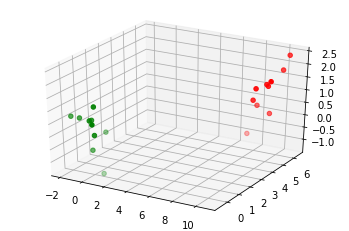

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2], c="green")
ax.scatter3D(Y[:,0], Y[:,1], Y[:,2], c="red")

In [0]:
def plot_transformation(X,Y,T):

  fig = plt.figure()
  ax = plt.axes(projection='3d')

  transformed_points = np.zeros(X.shape)
  for i in range(len(X)):
    transformed_points[i] = T.transform_array(X[i]).squeeze() # T.transform_array(X[i]) return (3,1) matrix

  ax.scatter3D(transformed_points[:,0], transformed_points[:,1], transformed_points[:,2], c="blue")
  ax.scatter3D(X[:,0], X[:,1], X[:,2], c="green")
  ax.scatter3D(Y[:,0], Y[:,1], Y[:,2], c="red")

  for i,j,k,h,l,m in zip(transformed_points[:,0], transformed_points[:,1], transformed_points[:,2], Y[:,0], Y[:,1], Y[:,2]):
      ax.plot([i,h],[j,l],[k,m],color = 'g')

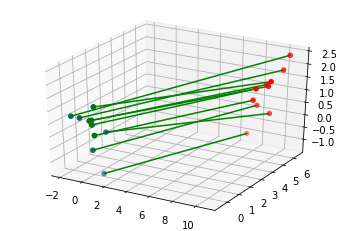

In [10]:
plot_transformation(X,Y,T)

In [11]:
transformed_points = np.zeros(X.shape)
cost = 0
for i in range(len(X)):
  transformed_points[i] = T.transform_array(X[i]).squeeze()
  r = Y[i]-T.transform_array(X[i]).squeeze()
  cost += 0.5*np.linalg.norm(r)**2
  print(cost)
print('\nfinal cost:',cost)

98.79431984576293
163.87747285647467
231.52627227369504
285.54843264938415
326.5596516227226
386.1609245562304
472.05282241764166
526.0428756886477
591.0427308380291
641.5446736309468

final cost: 641.5446736309468


## Task 2: Calculate the gradient
Use the results obtained in class to calculate the gradient of $\nabla_T C = \sum_{i=0}^N r_i^{\top} \frac{\partial r_i}{\partial T}$

In [12]:
grad = np.zeros(6)
for i in range(len(X)):
  r = Y[i]-T.transform_array(X[i]).squeeze()

  w1,w2,w3 = T.transform_array(X[i]).squeeze()
  diff = -1 * np.array([ [0, -w3, w2, 1,0,0], [w3, 0, -w1, 0,1,0], [-w2, w1, 0, 0,0,1] ])
  grad += r @ diff
  print(r @ diff)
  print(grad)
  print()

[ -4.39022853  11.26919077 -10.82615014 -12.36508806  -6.46226377
  -1.71242046]
[ -4.39022853  11.26919077 -10.82615014 -12.36508806  -6.46226377
  -1.71242046]

[ -3.3600824    6.70915114   1.42540224 -10.24545434  -4.92493658
  -0.97055198]
[ -7.75031093  17.97834191  -9.4007479  -22.6105424  -11.38720035
  -2.68297244]

[ -4.76039364  11.92200357  -1.51095682 -10.75001907  -4.38366028
  -0.71986907]
[-12.51070457  29.90034548 -10.91170472 -33.36056147 -15.77086063
  -3.40284151]

[-3.49946049  5.36905041  7.36123433 -9.20334563 -4.74398523 -0.91507052]
[-16.01016506  35.26939589  -3.55047039 -42.5639071  -20.51484586
  -4.31791203]

[  5.78235126 -10.90215196   8.66069613  -7.62536399  -4.7942852
  -0.94397639]
[-10.2278138   24.36724393   5.11022574 -50.18927109 -25.30913106
  -5.26188843]

[  0.21761339   0.06347804  -4.80150167 -10.12758291  -4.04622781
  -0.51249472]
[-10.01020041  24.43072197   0.30872407 -60.31685399 -29.35535887
  -5.77438314]

[ -3.72785601   8.80202727  -6

## Task 3: Update
Update your current best estimate $T$ according to the calcualted increment of coordinates in the manifold $\Delta \xi = - \alpha \cdot \nabla_T C$. In this particular case, we are proposing a simple steepest gradient descent optimization, where you can try $\alpha = 1/||\nabla_T C||$ and plot the new transformed result.

*Hint*: use SE3.update()

## UPDATE: Step size
In the original enunciate we suggested to use a step size $\alpha = 1/||\nabla_T C||$. However, we propose in our solution an alternative step size, a more conservative one, $\alpha = 0.01*[0.1, 0.1, 0.1, 1, 1, 1]$, where we have distinguished between coordinates in the manifold corresponding to rotation and coordinates corresponding to translation.

In [0]:
T = mrob.SE3(np.zeros(6))

In [14]:
alfas = 0.01*np.array([0.1,0.1,0.1,1,1,1])
grad, -1*grad*alfas
T.update_lhs(-1*grad*alfas)
T.T()

array([[ 0.99925992,  0.00849559, -0.03751579,  1.0000595 ],
       [-0.00913229,  0.99981661, -0.0168328 ,  0.49445028],
       [ 0.0373659 ,  0.01716294,  0.99915425,  0.12271104],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

## Task 4: Convergence
Iterate multiple times task 3 until you see convergence in your results. You can plot the results and stop untill you don't observe any update on the two set of points.

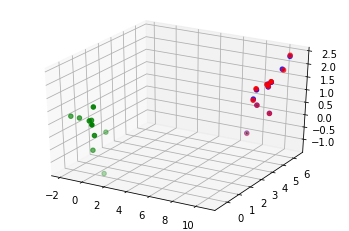

In [15]:
T = mrob.SE3(np.zeros(6))
alfas = 0.01*np.array([0.1,0.1,0.1,1,1,1])

cost_list = []

for j in range(10000):

  cost = 0
  grad = np.zeros(6)
  for i in range(len(X)):
    # w1,w2,w3 = T.transform_array(X[i]).squeeze()
    # grad_i = -np.array([ [0, w3, -w2, 1,0,0], [-w3, 0, w1, 0,1,0], [w2, -w1, 0, 0,0,1] ])
    
    rot = skew(T.transform(X[i]))
    grad_i = -np.hstack( (-rot , np.eye(3)))
    
    r = Y[i]-T.transform_array(X[i]).squeeze()
    grad += r @ grad_i

    cost += 0.5*np.linalg.norm(r)**2

  cost_list.append(cost)
  T.update_lhs(-1*grad*alfas)

plot_transformation(X,Y,T)

Last error 0.019070550528334212


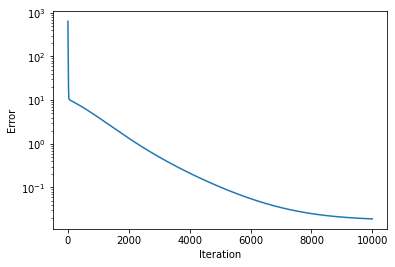

In [17]:
plt.semilogy(cost_list)
plt.xlabel('Iteration')
plt.ylabel('Error')

print('Last error', cost_list[-1])

<br/>
<br/>
<br/>

# Final solution

Last error 0.03813857480717909


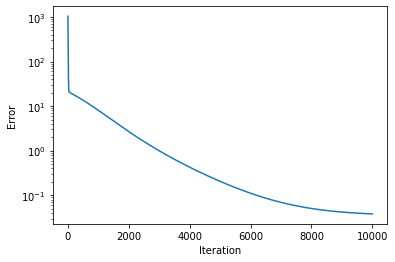

In [18]:
errors = []
grad = np.zeros(6)
T = mrob.SE3(np.zeros(6))


R = Y.T - T.transform_array(X.T)
    
for k in range(10000):
    grad = np.zeros(6)
    for i in range(10):
        r = R[:,i]
        rot = skew(T.transform(X[i]))
        grad_i = -np.hstack( (-rot , np.eye(3)))
        grad = grad + r @ grad_i
    alpha = 0.01*np.hstack((0.1*np.ones(3),np.ones(3)))
    T.update_lhs(- alpha * grad)
    R = Y.T - T.transform_array(X.T)
    error = np.trace(R @ R.T)
    
    errors.append(error)
    
plt.semilogy(errors)
plt.xlabel('Iteration')
plt.ylabel('Error')

print('Last error', errors[-1])

# Estimation of transformed point cloud
Here `Y` and `Y_` don't coincide completely because of noisy transformation $\tilde Y = T \cdot (\tilde X + \tilde N)$, where $N$ is matrix of noise.  
Symbol $\tilde{}$ used to highlight extended matrices created by homogeneous coordinates. 

In [0]:
Y_ = T.transform_array(X.T).T    

Last error value: 0.03813857480717909


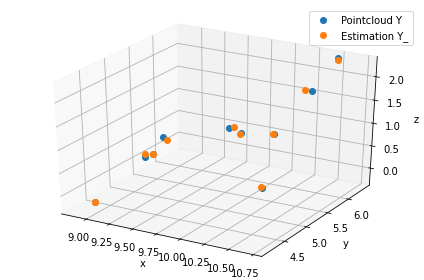

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(Y[:,0], Y[:,1], Y[:,2], 'o', label='Pointcloud Y')
ax.plot(Y_[:,0], Y_[:,1], Y_[:,2], 'o', label='Estimation Y_')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.tight_layout()

R = Y.T - T.transform_array(X.T)
error = np.trace(R @ R.T)

print('Last error value:', errors[-1])

# Estimation of RBT

In [22]:
T_ = T.T()

print('Estimated RBT:', T_, sep='\n')

Estimated RBT:
[[-0.14189338  0.8557771   0.49750561  9.99669848]
 [-0.89427094  0.1046762  -0.43511192  4.99849386]
 [-0.42443581 -0.50664431  0.75044373  0.99875326]
 [ 0.          0.          0.          1.        ]]


# True RBT

In [23]:
gdd.download_file_from_google_drive(file_id='1OkOF3UBlKTf4ATtZytMY7c94hKVFJRcb',
                                    dest_path='./T.pkl',
                                    unzip=False)


print('True RBT:', load_obj('T'), sep='\n')

True RBT:
[[-0.15566203  0.85268065  0.49870336 10.        ]
 [-0.88223334  0.10708737 -0.45847205  5.        ]
 [-0.44433508 -0.51133942  0.73559386  1.        ]
 [ 0.          0.          0.          1.        ]]
